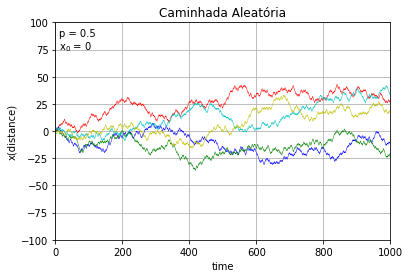

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

#parametros
x0 = 0 #posicao inicial
p = 0.5 #probabilidade de passo p/ direita e 1-p p/ esquerda
t = 10 # numero de iteracoes


numbersx = np.arange(t+1) #numero de iterações
numbersy = np.arange(-t,t+1)

def Caminho_aleatorio(X0,T,p):#primeiro termo é a condição inicial, 2a termo é o numero de iteraçoes
    lista = []
    x = X0
    lista.append(x)
    for i in range(0,T):
        if random.random() < p:
            x = x + 1
        else:
            x = x - 1
        lista.append(x)
    return np.array(lista)


T = 1000

x1 = Caminho_aleatorio(x0,T,p)
x2 = Caminho_aleatorio(x0,T,p)
x3 = Caminho_aleatorio(x0,T,p)
x4 = Caminho_aleatorio(x0,T,p)
x5 = Caminho_aleatorio(x0,T,p)


t_plot = np.arange(T+1)


plt.plot(t_plot,x1,'r-',linewidth=0.5)
plt.plot(t_plot,x2,'b-',linewidth=0.5)
plt.plot(t_plot,x3,'g-',linewidth=0.5)
plt.plot(t_plot,x4,'c-',linewidth=0.5)
plt.plot(t_plot,x5,'y-',linewidth=0.5)
plt.grid(True)
plt.axis([0, T, -100, 100])
plt.xlabel('time')
plt.ylabel('x(distance)')
plt.title('Caminhada Aleatória')
plt.text(10, 95, f'p = {p} \nx$_0$ = {x0}',va='top',ha='left')
#plt.xticks(numbersx)
#plt.yticks(numbersy)
plt.show()


[5.00676931e+00 1.01097370e+01 9.99839228e+01 1.00716861e+03
 9.92505664e+03]


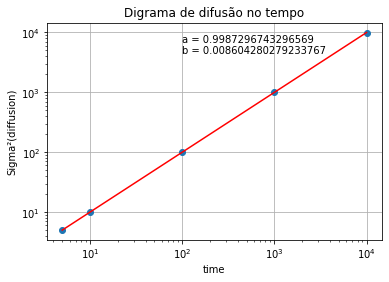

In [2]:

def Caminhadas_aleatorias_de_max_T(N,x0,p,T_values): #modificado para receber os paramentros do sigma quadrado
    x_lista = []
    x_soma_quadrado = []
    x_soma = []
    soma_aux = 0
    soma_aux_quadrado = 0
    for i in range(len(T_values)):
        x_of_T = []
        for _ in range(N):
            x = Caminho_aleatorio(x0,T_values[i],p)
            x_of_T.append(x[-1])
            soma_aux += x[-1]
            soma_aux_quadrado += (x[-1]**2)
        x_lista.append(x_of_T)
        x_soma.append(soma_aux)
        x_soma_quadrado.append(soma_aux_quadrado)
        soma_aux = 0
        soma_aux_quadrado = 0
    return np.array(x_lista,dtype=float), np.array(x_soma), np.array(x_soma_quadrado)

T_values = [5,10,100,1000,10000]
N = 100000
#x_lista,x_soma,x_quadrado = Caminhadas_aleatorias_de_max_T(N,x0,p,T_values)
#x_lista_copy = np.array(x_lista,dtype=float)

soma_caminhada = np.loadtxt('Sample_soma_caminhada_1D.csv', delimiter=',')

soma_quadrado_caminhada = np.loadtxt('Sample_quadrado_caminhada_1D.csv', delimiter=',')

#print(soma_caminhada)
#print(soma_quadrado_caminhada)

def difusion_squared(soma,quadrado,T_values,N):
    sigma_2 = []
    for i in range(len(T_values)):
        sigma_2.append((quadrado[i]/N)-(soma[i]/N)**2 )
    return np.array(sigma_2)

sigma_sqr = difusion_squared(soma_caminhada,soma_quadrado_caminhada,T_values,N)

print(sigma_sqr)
#plt.plot(T_values,sigma)
#plt.grid(True)
#plt.show()

f = lambda x,a,b: a*x + b

r = scipy.optimize.curve_fit(f, np.log(T_values), np.log(sigma_sqr))[0]
#r = scipy.optimize.curve_fit(f, T_values, sigma_sqr)[0]

a = r[0]
b = r[1]

x_fit = np.linspace(T_values[0],T_values[-1],1000)
y_fit = f(x_fit,a,b)

fig,ax = plt.subplots(nrows=1,ncols=1)

ax.plot(T_values,sigma_sqr,'o')
ax.plot(x_fit,y_fit,'-r')
ax.set_xlabel('time')
ax.set_ylabel('Sigma²(diffusion)')
ax.set_title('Digrama de difusão no tempo')
ax.text(100,9400,f'a = {r[0]}\nb = {r[1]}',va='top',ha='left')
ax.grid(True)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()
